In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support, accuracy_score,mean_squared_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
train_data = pd.read_csv('train.csv')

In [4]:
train_data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [521]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
to_be_removed = train_data.isnull().sum().sort_values(ascending=False) > 1
to_be_removed = pd.DataFrame({'features':to_be_removed.index, 'isNull':to_be_removed.values})
to_be_removed = list(to_be_removed[to_be_removed['isNull']==True].features.values)
to_be_removed

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageCond',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrArea',
 'MasVnrType']

In [6]:
to_be_removed.remove('BsmtQual')

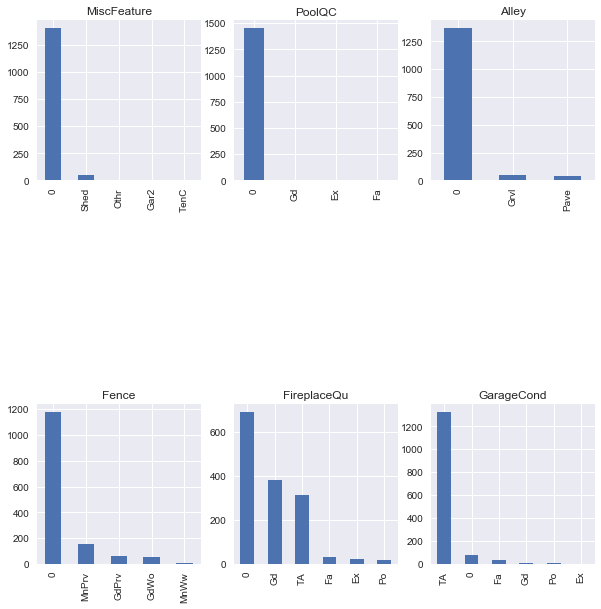

In [8]:
to_be_removed
train_data['Alley'] = train_data['Alley'].fillna(0)
train_data['PoolQC'] = train_data['PoolQC'].fillna(0)
train_data['MiscFeature'] = train_data['MiscFeature'].fillna(0)
train_data['Fence'] = train_data['Fence'].fillna(0)
train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna(0)
train_data['GarageCond'] = train_data['GarageCond'].fillna(0)
train_data['GarageType'] = train_data['GarageType'].fillna(0)
train_data['GarageFinish'] = train_data['GarageFinish'].fillna(0)
train_data['BsmtExposure'] = train_data['BsmtExposure'].fillna(0)
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].fillna(0)
train_data['BsmtFinType1'] = train_data['BsmtFinType1'].fillna(0)
train_data['BsmtCond'] = train_data['BsmtCond'].fillna(0)

import pylab as plt


plt.rc('figure', figsize=(10, 4))

fizsize_with_subplots = (10, 10)

bin_size = 10
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 3)


plt.subplot2grid(fig_dims, (0, 0))
train_data['MiscFeature'].value_counts().plot(kind='bar', 
                                         title='MiscFeature')
plt.subplot2grid(fig_dims, (0, 1))
train_data['PoolQC'].value_counts().plot(kind='bar', 
                                         title='PoolQC')

plt.subplot2grid(fig_dims, (0, 2))
train_data['Alley'].value_counts().plot(kind='bar', 
                                         title='Alley')

plt.subplot2grid(fig_dims, (2, 0))
train_data['Fence'].value_counts().plot(kind='bar', 
                                         title='Fence')

plt.subplot2grid(fig_dims, (2, 1))
train_data['FireplaceQu'].value_counts().plot(kind='bar', 
                                         title='FireplaceQu')

plt.subplot2grid(fig_dims, (2, 2))
train_data['GarageCond'].value_counts().plot(kind='bar', 
                                         title='GarageCond')


In [9]:
train_data.drop(to_be_removed, axis = 1, inplace = True)

In [10]:
train_data.columns.shape

(64,)

In [11]:
train_data.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
                 ..
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageCars        0
GarageArea        0
PavedDrive        0
WoodDeckSF        0


In [12]:
train_data.isnull().sum()


Id                0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
                 ..
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageCars        0
GarageArea        0
PavedDrive        0
WoodDeckSF        0


In [13]:
quality_mapping = {'Ex':5, 'Gd':4, 'TA':3 , 'Fa':2, 'Po':1, 'NA':0}

In [15]:
for c in train_data.columns:
    if train_data[c].dtype == 'object':
        print (c, train_data[c].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll' 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFa

In [16]:
for c in train_data.columns:
    if train_data[c].dtype == 'object' and any(x in train_data[c].unique() for x in quality_mapping):
        print (c, train_data[c].unique())
        train_data[c] = train_data[c].map(quality_mapping)

ExterQual ['Gd' 'TA' 'Ex' 'Fa']
ExterCond ['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtQual ['Gd' 'TA' 'Ex' nan 'Fa']
HeatingQC ['Ex' 'Gd' 'TA' 'Fa' 'Po']
KitchenQual ['Gd' 'TA' 'Ex' 'Fa']


In [17]:
train_data.ExterCond

0       3
1       3
2       3
3       3
4       3
5       3
6       3
7       3
8       3
9       3
10      3
11      3
12      3
13      3
14      3
15      3
16      3
17      3
18      3
19      3
20      3
21      3
22      3
23      3
24      4
25      3
26      3
27      3
28      3
29      3
       ..
1430    3
1431    3
1432    3
1433    3
1434    3
1435    4
1436    3
1437    3
1438    3
1439    3
1440    3
1441    3
1442    3
1443    3
1444    3
1445    3
1446    3
1447    3
1448    3
1449    3
1450    3
1451    3
1452    3
1453    3
1454    3
1455    3
1456    3
1457    4
1458    3
1459    3
Name: ExterCond, Length: 1460, dtype: int64

In [18]:
train_data.isnull().sum()


Id                0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
                 ..
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageCars        0
GarageArea        0
PavedDrive        0
WoodDeckSF        0


In [19]:
train_data.BsmtQual[17]

nan

In [20]:
train_data.isnull().sum()


Id                0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
                 ..
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageCars        0
GarageArea        0
PavedDrive        0
WoodDeckSF        0


In [21]:
train_data['BsmtQual']=train_data['BsmtQual'].fillna(0)

In [22]:
train_data.columns[train_data.isnull().any()]

Index(['Electrical'], dtype='object')

In [23]:
train_data.Electrical

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
5       SBrkr
6       SBrkr
7       SBrkr
8       FuseF
9       SBrkr
10      SBrkr
11      SBrkr
12      SBrkr
13      SBrkr
14      SBrkr
15      FuseA
16      SBrkr
17      SBrkr
18      SBrkr
19      SBrkr
20      SBrkr
21      FuseF
22      SBrkr
23      SBrkr
24      SBrkr
25      SBrkr
26      SBrkr
27      SBrkr
28      SBrkr
29      SBrkr
        ...  
1430    SBrkr
1431    SBrkr
1432    SBrkr
1433    SBrkr
1434    SBrkr
1435    SBrkr
1436    SBrkr
1437    SBrkr
1438    FuseA
1439    SBrkr
1440    SBrkr
1441    SBrkr
1442    SBrkr
1443    FuseF
1444    SBrkr
1445    SBrkr
1446    SBrkr
1447    SBrkr
1448    SBrkr
1449    SBrkr
1450    SBrkr
1451    SBrkr
1452    SBrkr
1453    SBrkr
1454    SBrkr
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object

In [24]:
train_data.Electrical.mode()[0]
train_data['Electrical'] = train_data['Electrical'].fillna(train_data.Electrical.mode())

In [25]:
train_data.isnull().sum().max()

1

In [26]:
train_data.columns[train_data.isnull().any()]

Index(['Electrical'], dtype='object')

In [27]:
train_data.Electrical.isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1430    False
1431    False
1432    False
1433    False
1434    False
1435    False
1436    False
1437    False
1438    False
1439    False
1440    False
1441    False
1442    False
1443    False
1444    False
1445    False
1446    False
1447    False
1448    False
1449    False
1450    False
1451    False
1452    False
1453    False
1454    False
1455    False
1456    False
1457    False
1458    False
1459    False
Name: Electrical, Length: 1460, dtype: bool

In [28]:
m=train_data['Electrical'].mode()[0]

In [29]:
train_data['Electrical'] = train_data['Electrical'].fillna(m)

In [30]:
train_data.isnull().sum().sum()

0

In [31]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
ExterQual          int64
ExterCond          int64
Foundation        object
BsmtQual         float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
                  ...   
Electrical        object
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64


In [32]:
for c in train_data.columns[train_data.dtypes == 'object']:
    print (c)
    feature_char = sorted(train_data[c].unique())
    count = 1
    mapping = dict()
    for key in feature_char:
        mapping[key] = count
        count += 1
    print (mapping)
    train_data[c] = train_data[c].map(mapping)


MSZoning
{'C (all)': 1, 'FV': 2, 'RH': 3, 'RL': 4, 'RM': 5}
Street
{'Grvl': 1, 'Pave': 2}
LotShape
{'IR1': 1, 'IR2': 2, 'IR3': 3, 'Reg': 4}
LandContour
{'Bnk': 1, 'HLS': 2, 'Low': 3, 'Lvl': 4}
Utilities
{'AllPub': 1, 'NoSeWa': 2}
LotConfig
{'Corner': 1, 'CulDSac': 2, 'FR2': 3, 'FR3': 4, 'Inside': 5}
LandSlope
{'Gtl': 1, 'Mod': 2, 'Sev': 3}
Neighborhood
{'Blmngtn': 1, 'Blueste': 2, 'BrDale': 3, 'BrkSide': 4, 'ClearCr': 5, 'CollgCr': 6, 'Crawfor': 7, 'Edwards': 8, 'Gilbert': 9, 'IDOTRR': 10, 'MeadowV': 11, 'Mitchel': 12, 'NAmes': 13, 'NPkVill': 14, 'NWAmes': 15, 'NoRidge': 16, 'NridgHt': 17, 'OldTown': 18, 'SWISU': 19, 'Sawyer': 20, 'SawyerW': 21, 'Somerst': 22, 'StoneBr': 23, 'Timber': 24, 'Veenker': 25}
Condition1
{'Artery': 1, 'Feedr': 2, 'Norm': 3, 'PosA': 4, 'PosN': 5, 'RRAe': 6, 'RRAn': 7, 'RRNe': 8, 'RRNn': 9}
Condition2
{'Artery': 1, 'Feedr': 2, 'Norm': 3, 'PosA': 4, 'PosN': 5, 'RRAe': 6, 'RRAn': 7, 'RRNn': 8}
BldgType
{'1Fam': 1, '2fmCon': 2, 'Duplex': 3, 'Twnhs': 4, 'TwnhsE': 5

In [33]:
train_data.MSZoning

0       4
1       4
2       4
3       4
4       4
5       4
6       4
7       4
8       5
9       4
10      4
11      4
12      4
13      4
14      4
15      5
16      4
17      4
18      4
19      4
20      4
21      5
22      4
23      5
24      4
25      4
26      4
27      4
28      4
29      5
       ..
1430    4
1431    4
1432    4
1433    4
1434    4
1435    4
1436    4
1437    4
1438    5
1439    4
1440    4
1441    5
1442    2
1443    4
1444    4
1445    4
1446    4
1447    4
1448    4
1449    5
1450    4
1451    4
1452    5
1453    4
1454    2
1455    4
1456    4
1457    4
1458    4
1459    4
Name: MSZoning, Length: 1460, dtype: int64

In [34]:
all(train_data.dtypes == 'object')


False

In [35]:
train_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,4,8450,2,4,4,1,5,1,...,0,0,0,0,0,2,2008,9,5,208500
1,2,20,4,9600,2,4,4,1,3,1,...,0,0,0,0,0,5,2007,9,5,181500
2,3,60,4,11250,2,1,4,1,5,1,...,0,0,0,0,0,9,2008,9,5,223500
3,4,70,4,9550,2,1,4,1,1,1,...,272,0,0,0,0,2,2006,9,1,140000
4,5,60,4,14260,2,1,4,1,3,1,...,0,0,0,0,0,12,2008,9,5,250000
5,6,50,4,14115,2,1,4,1,5,1,...,0,320,0,0,700,10,2009,9,5,143000
6,7,20,4,10084,2,4,4,1,5,1,...,0,0,0,0,0,8,2007,9,5,307000
7,8,60,4,10382,2,1,4,1,1,1,...,228,0,0,0,350,11,2009,9,5,200000
8,9,50,5,6120,2,4,4,1,5,1,...,205,0,0,0,0,4,2008,9,1,129900
9,10,190,4,7420,2,4,4,1,1,1,...,0,0,0,0,0,1,2008,9,5,118000


In [36]:
train_data.corr()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.006096,-0.033226,0.008916,0.032122,-0.019659,0.013324,0.049756,0.005847,...,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,0.019773,-0.005806,-0.021917
MSSubClass,0.011156,1.000000,0.035900,-0.139781,-0.024969,0.119289,-0.002940,-0.022844,0.075910,-0.025672,...,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,-0.006096,0.035900,1.000000,-0.034452,0.087654,0.061887,-0.017854,-0.001192,-0.009895,-0.022055,...,0.115509,0.000362,0.019089,-0.003128,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotArea,-0.033226,-0.139781,-0.034452,1.000000,-0.197131,-0.165315,-0.149083,0.010123,-0.121161,0.436868,...,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
Street,0.008916,-0.024969,0.087654,-0.197131,1.000000,-0.010224,0.115995,0.001682,0.013960,-0.179360,...,0.023082,0.007473,-0.033160,0.004413,-0.022733,0.003690,-0.025043,0.014339,0.006064,0.041036
LotShape,0.032122,0.119289,0.061887,-0.165315,-0.010224,1.000000,0.085434,-0.036101,0.221102,-0.099951,...,0.078213,-0.036459,-0.053054,-0.020051,-0.042061,-0.033455,0.036449,-0.000911,-0.038118,-0.255580
LandContour,-0.019659,-0.002940,-0.017854,-0.149083,0.115995,0.085434,1.000000,0.008238,-0.025527,-0.374267,...,-0.058742,-0.021404,0.003836,-0.013098,0.020912,-0.011599,0.020507,-0.025754,0.033809,0.015453
Utilities,0.013324,-0.022844,-0.001192,0.010123,0.001682,-0.036101,0.008238,1.000000,-0.032589,-0.005909,...,-0.009407,-0.003046,0.102365,-0.001798,-0.002296,-0.051552,0.023353,-0.126770,-0.089701,-0.014314
LotConfig,0.049756,0.075910,-0.009895,-0.121161,0.013960,0.221102,-0.025527,-0.032589,1.000000,-0.007256,...,-0.070429,-0.030479,-0.004657,-0.046798,-0.018427,0.018902,-0.005992,0.014325,0.051579,-0.067396
LandSlope,0.005847,-0.025672,-0.022055,0.436868,-0.179360,-0.099951,-0.374267,-0.005909,-0.007256,1.000000,...,-0.008843,0.008694,0.052976,-0.015505,-0.003518,0.007072,-0.002305,0.054858,-0.043095,0.051152


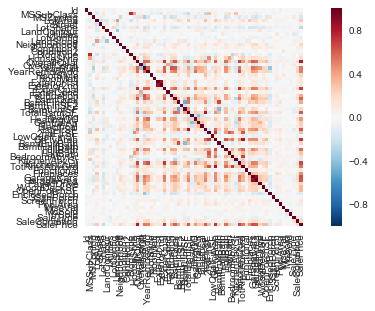

In [37]:
corrmat = train_data.corr()
sb.heatmap(corrmat, vmax=1, square=True)

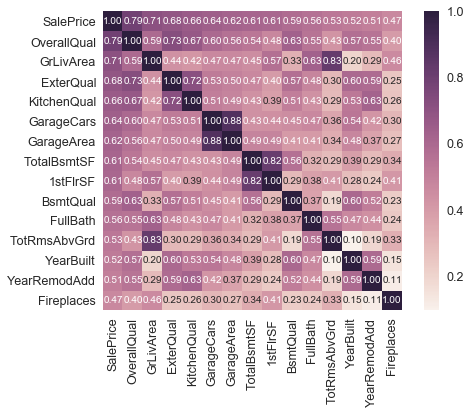

In [38]:
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sb.set(font_scale=1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

In [39]:
best_features = train_data.corr().nlargest(30,'SalePrice')['SalePrice'].index
new_train = train_data[best_features]

In [40]:
new_train

,SalePrice,OverallQual,GrLivArea,ExterQual,KitchenQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,BsmtQual,...,OpenPorchSF,HalfBath,LotArea,CentralAir,Electrical,PavedDrive,BsmtFullBath,RoofStyle,BsmtUnfSF,SaleCondition
0,208500,7,1710,4,4,2,548,856,856,4.0,...,61,1,8450,2,5,3,1,2,150,5
1,181500,6,1262,3,3,2,460,1262,1262,4.0,...,0,0,9600,2,5,3,0,2,284,5
2,223500,7,1786,4,4,2,608,920,920,4.0,...,42,1,11250,2,5,3,1,2,434,5
3,140000,7,1717,3,4,3,642,756,961,3.0,...,35,0,9550,2,5,3,1,2,540,1
4,250000,8,2198,4,4,3,836,1145,1145,4.0,...,84,1,14260,2,5,3,1,2,490,5
5,143000,5,1362,3,3,2,480,796,796,4.0,...,30,1,14115,2,5,3,1,2,64,5
6,307000,8,1694,4,4,2,636,1686,1694,5.0,...,57,0,10084,2,5,3,1,2,317,5
7,200000,7,2090,3,3,2,484,1107,1107,4.0,...,204,1,10382,2,5,3,1,2,216,5
8,129900,7,1774,3,3,2,468,952,1022,3.0,...,0,0,6120,2,2,3,0,2,952,1
9,118000,5,1077,3,3,1,205,991,1077,3.0,...,4,0,7420,2,5,3,1,2,140,5


In [41]:
npdf = new_train.values

In [42]:
ytrain = npdf[:,0]

In [43]:
xtrain = npdf[:,1:]

In [44]:
xtrain.shape

(1460, 29)

In [45]:
ytrain.shape

(1460,)

In [46]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
new_train['SalePrice'].values

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [48]:
regr.score


<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [49]:
xpred = regr.predict(xtrain)
# ypred = regr.predict(ytrain)
xpred

array([ 222887.64866939,  176358.92519273,  227662.47243066, ...,
        250575.84265411,  149369.77899352,  164495.51972364])

In [51]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=0.25, random_state=1)

In [52]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
regr.score(X_test, y_test)

0.83035031081648314

In [54]:
from sklearn.linear_model import perceptron

In [55]:
net = perceptron.Perceptron(n_iter=100, verbose=0, random_state=None, fit_intercept=True, eta0=0.002)

In [56]:
net


Perceptron(alpha=0.0001, class_weight=None, eta0=0.002, fit_intercept=True,
      n_iter=100, n_jobs=1, penalty=None, random_state=None, shuffle=True,
      verbose=0, warm_start=False)

In [57]:
net.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.002, fit_intercept=True,
      n_iter=100, n_jobs=1, penalty=None, random_state=None, shuffle=True,
      verbose=0, warm_start=False)

In [58]:
net.score(X_test, y_test)

0.0027397260273972603

In [59]:
net.predict(X_test)


array([ 310000.,  310000.,  311872.,  130000.,  311872.,  310000.,
        310000.,  130000.,  310000.,  311872.,  311872.,  130000.,
        311872.,  280000.,  311872.,  130000.,  130000.,  311872.,
        311872.,  311872.,  311872.,  310000.,  311872.,  311872.,
        130000.,  310000.,  130000.,  311872.,  310000.,  310000.,
        310000.,  130000.,  311872.,  112000.,  311872.,  311872.,
        311872.,  130000.,  310000.,  112000.,  130000.,  311872.,
        130000.,  311872.,  130000.,  311872.,  130000.,  130000.,
        311872.,  310000.,  112000.,  310000.,  311872.,  310000.,
        311872.,  130000.,  130000.,  310000.,  311872.,  310000.,
        311872.,  310000.,  130000.,  311872.,  311872.,  311872.,
        130000.,  280000.,  311872.,  311872.,  190000.,  130000.,
        310000.,  310000.,  310000.,  311872.,  130000.,  130000.,
        311872.,  311872.,  310000.,  130000.,  311872.,  311872.,
        310000.,  311872.,  310000.,  311872.,  310000.,  3100

In [60]:
net.score(X_test, y_test)

0.0027397260273972603

In [260]:
y_test

array([ 231500.,  179500.,  122000.,   84500.,  142000.,  325624.,
        285000.,  151000.,  195000.,  275000.,  175000.,   61000.,
        174000.,  385000.,  230000.,   87000.,  125000.,   98600.,
        260000.,  143000.,  124000.,  122500.,  236500.,  337500.,
         76000.,  187000.,  128000.,  179000.,  485000.,  122500.,
        106000.,  118000.,  127000.,   80000.,  153000.,  360000.,
        132000.,   85500.,  262280.,  112000.,  131000.,  139000.,
         87000.,  135000.,  181000.,  163500.,  116900.,  159895.,
        244600.,  294000.,   97000.,  295000.,  120500.,  239500.,
        194000.,  115000.,  119500.,  180000.,  118000.,  178000.,
        167000.,  267000.,   82000.,  133900.,  167000.,  132500.,
        135000.,  248000.,  160000.,  144500.,  200500.,  113000.,
        354000.,  164000.,  170000.,  224000.,  163900.,  160000.,
        466500.,  172500.,  193500.,  133000.,  137000.,  167500.,
        196500.,  146000.,  159500.,  158000.,  189000.,  1725

In [61]:
from sklearn.neural_network import MLPRegressor

In [62]:
mlpr = MLPRegressor(hidden_layer_sizes=(30))

In [63]:
mlpr.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=30, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [279]:
mlpr.score(X_test, y_test)

0.29366899825247883

In [64]:
mlpr.predict(X_test)

array([ 193979.74431136,  178553.81612938,  145696.46279869,
         91156.34068993,  173274.8197082 ,  226760.91011525,
        225466.5082679 ,  129990.32907366,  195405.99852398,
        203068.12797592,  197150.36176846,  133423.69812554,
        166901.63033807,  313258.43489938,  201675.42324108,
        155827.29836616,  136382.4989104 ,  169443.5630599 ,
        218033.49251329,  143673.72469523,  148139.8480484 ,
        198769.10491663,  183806.62261448,  219823.25730979,
        138312.89352219,  183717.4089696 ,  147256.64644321,
        182756.66913573,  280234.05643662,  132835.54378954,
        185503.50709276,  119133.72132181,  140391.16828129,
        144010.89149126,  173060.20674265,  234453.7394524 ,
        146769.23701589,  116959.46157778,  229305.75307029,
        160695.29231697,  174430.15322418,  165201.99204554,
        125815.98579315,  149797.25170527,  177587.38101638,
        204088.94189322,  133157.06529592,  148813.72059314,
        203471.3468004 ,

In [65]:
mlpr = MLPRegressor(hidden_layer_sizes=(30))
mlpr.fit(X_train, y_train)
mlpr.score(X_test, y_test)

0.44297559249183216

In [66]:
mlpr = MLPRegressor(hidden_layer_sizes=(50))
mlpr.fit(X_train, y_train)
mlpr.score(X_test, y_test)

0.5437514115165859

In [67]:
mlpr = MLPRegressor(hidden_layer_sizes=(60))
mlpr.fit(X_train, y_train)
mlpr.score(X_test, y_test)

0.56139248128414354

In [68]:
mlpr = MLPRegressor(hidden_layer_sizes=(80))
mlpr.fit(X_train, y_train)
mlpr.score(X_test, y_test)

0.6083355523385735

In [69]:
mlpr = MLPRegressor(hidden_layer_sizes=(100))
mlpr.fit(X_train, y_train)
mlpr.score(X_test, y_test)

0.60571186569877133

In [70]:
mlpr = MLPRegressor(hidden_layer_sizes=(110))
mlpr.fit(X_train, y_train)
mlpr.score(X_test, y_test)

0.65478915971007678

In [71]:
mlpr = MLPRegressor(hidden_layer_sizes=(15,30,10))
mlpr.fit(X_train, y_train)
mlpr.score(X_test, y_test)

0.7451001297570975

In [295]:
mlpr = MLPRegressor(hidden_layer_sizes=(100,50))
mlpr.fit(X_train, y_train)
mlpr.score(X_test, y_test)

0.74048568658434544

In [296]:
'''
RANDOM FOREST CLASIFIER
'''

'\nRANDOM FOREST CLASIFIER\n'

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
rfr = RandomForestRegressor()

In [74]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [75]:
rfr.score(X_test,y_test)

0.8925696815298112

In [77]:
rfr.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [78]:
rfr.n_estimators

10

In [112]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()

In [113]:
ad.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [114]:
ad.score(X_test,y_test)

0.010958904109589041

In [117]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()

In [118]:
k.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [119]:
k.score(X_test,y_test)

0.010958904109589041

In [320]:
'''
    LoGISTIC REGRESSION from here


'''

'\n    LoGISTIC REGRESSION from here\n\n\n'

In [326]:
from sklearn.linear_model import LogisticRegressionCV
lgr = LogisticRegressionCV()
lgr.fit(X_train,y_train)
lgr.score(X_test,y_test)

0.01643835616438356

AttributeError: 'PathCollection' object has no attribute 'xlabel'

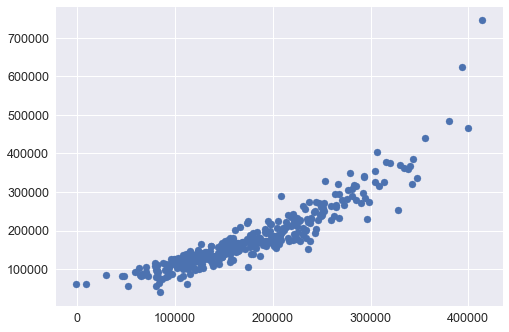

In [79]:
plt.scatter(regr.predict(X_test), y_test).xlabel('Predicted').ylabel('Measured')

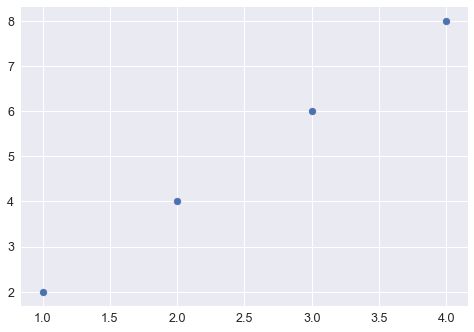

In [80]:
plt.scatter([1,2,3,4],[2,4,6,8])

In [81]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [358]:
#now preprocess the test data

In [82]:
best_features=list(best_features)
best_features.remove('SalePrice')

In [83]:
len(best_features)

29

In [84]:
test_data = pd.read_csv('test.csv')
test_data = test_data[best_features]
test_data.columns

Index(['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual', 'FullBath',
       'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'HeatingQC',
       'BsmtFinSF1', 'Foundation', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF',
       'HalfBath', 'LotArea', 'CentralAir', 'Electrical', 'PavedDrive',
       'BsmtFullBath', 'RoofStyle', 'BsmtUnfSF', 'SaleCondition'],
      dtype='object')

In [85]:
'''Getting all rows having non-null values. For testing, we need not do any interpolation because our motive is not to train the model but to use it to predict clean test data-points'''

'Getting all rows having non-null values. For testing, we need not do any interpolation because our motive is not to train the model but to use it to predict clean test data-points'

In [86]:
test_data = test_data[test_data.notnull().sum(axis=1) == 29]

In [87]:
test_data.isnull().sum().sum()


0

In [411]:
#now convert from int to num

In [88]:
quality_mapping

{'Ex': 5, 'Fa': 2, 'Gd': 4, 'NA': 0, 'Po': 1, 'TA': 3}

In [89]:
for c in test_data.columns:
    if test_data[c].dtype == 'object' and any(x in test_data[c].unique() for x in quality_mapping):
        print (c, test_data[c].unique())
        test_data[c] = test_data[c].map(quality_mapping)

ExterQual ['TA' 'Gd' 'Ex' 'Fa']
KitchenQual ['TA' 'Gd' 'Ex' 'Fa']
BsmtQual ['TA' 'Gd' 'Ex' 'Fa']
HeatingQC ['TA' 'Gd' 'Ex' 'Fa' 'Po']


In [90]:
test_data.head()

,OverallQual,GrLivArea,ExterQual,KitchenQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,BsmtQual,FullBath,...,OpenPorchSF,HalfBath,LotArea,CentralAir,Electrical,PavedDrive,BsmtFullBath,RoofStyle,BsmtUnfSF,SaleCondition
0,5,896,3,3,1.0,730.0,882.0,896,3,1,...,0,0,11622,Y,SBrkr,Y,0.0,Gable,270.0,Normal
1,6,1329,3,4,1.0,312.0,1329.0,1329,3,1,...,36,1,14267,Y,SBrkr,Y,0.0,Hip,406.0,Normal
2,5,1629,3,3,2.0,482.0,928.0,928,4,2,...,34,1,13830,Y,SBrkr,Y,0.0,Gable,137.0,Normal
3,6,1604,3,4,2.0,470.0,926.0,926,3,2,...,36,1,9978,Y,SBrkr,Y,0.0,Gable,324.0,Normal
4,8,1280,4,4,2.0,506.0,1280.0,1280,4,2,...,82,0,5005,Y,SBrkr,Y,0.0,Gable,1017.0,Normal


In [91]:
for c in test_data.columns[test_data.dtypes == 'object']:
    print (c)
    feature_char = sorted(test_data[c].unique())
    count = 1
    mapping = dict()
    for key in feature_char:
        mapping[key] = count
        count += 1
    print (mapping)
    test_data[c] = test_data[c].map(mapping)


Foundation
{'BrkTil': 1, 'CBlock': 2, 'PConc': 3, 'Stone': 4, 'Wood': 5}
CentralAir
{'N': 1, 'Y': 2}
Electrical
{'FuseA': 1, 'FuseF': 2, 'FuseP': 3, 'SBrkr': 4}
PavedDrive
{'N': 1, 'P': 2, 'Y': 3}
RoofStyle
{'Flat': 1, 'Gable': 2, 'Gambrel': 3, 'Hip': 4, 'Mansard': 5, 'Shed': 6}
SaleCondition
{'Abnorml': 1, 'AdjLand': 2, 'Alloca': 3, 'Family': 4, 'Normal': 5, 'Partial': 6}


In [92]:
test_data.head()

,OverallQual,GrLivArea,ExterQual,KitchenQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,BsmtQual,FullBath,...,OpenPorchSF,HalfBath,LotArea,CentralAir,Electrical,PavedDrive,BsmtFullBath,RoofStyle,BsmtUnfSF,SaleCondition
0,5,896,3,3,1.0,730.0,882.0,896,3,1,...,0,0,11622,2,4,3,0.0,2,270.0,5
1,6,1329,3,4,1.0,312.0,1329.0,1329,3,1,...,36,1,14267,2,4,3,0.0,4,406.0,5
2,5,1629,3,3,2.0,482.0,928.0,928,4,2,...,34,1,13830,2,4,3,0.0,2,137.0,5
3,6,1604,3,4,2.0,470.0,926.0,926,3,2,...,36,1,9978,2,4,3,0.0,2,324.0,5
4,8,1280,4,4,2.0,506.0,1280.0,1280,4,2,...,82,0,5005,2,4,3,0.0,2,1017.0,5


In [514]:
#now our columns in the test data must be in the same order as the train

In [93]:
new_train.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual',
       'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual',
       'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces',
       'HeatingQC', 'BsmtFinSF1', 'Foundation', 'WoodDeckSF', '2ndFlrSF',
       'OpenPorchSF', 'HalfBath', 'LotArea', 'CentralAir', 'Electrical',
       'PavedDrive', 'BsmtFullBath', 'RoofStyle', 'BsmtUnfSF',
       'SaleCondition'],
      dtype='object')

In [516]:
#loadintg test dateset on the basis of best features took care of that.

<Container object of 1413 artists>

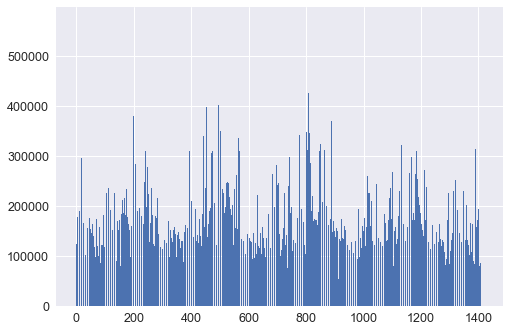

In [94]:
test_predictions = rfr.predict(test_data)
test_predictions
plt.bar(range(1,test_predictions.shape[0]+1),test_predictions)

In [95]:
test_predictions

array([ 123640. ,  160465. ,  185290. , ...,  169045.9,  129010. ,
        234767.8])

In [97]:
#checking the validation accuracy with 15 features


features15 = train_data.corr().nlargest(16,'SalePrice')['SalePrice'].index
new_train15 = train_data[features15]

In [98]:
features15

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual',
       'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual',
       'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces',
       'HeatingQC'],
      dtype='object')

Predictions : [ 196150.   187050.   120865.    81750.   151020.   350464.   312201.3
  146240.8  223700.   219960.   180065.    72130.   189510.   343200.
  248755.6  132995.   116760.   148140.   184559.   127490.   109650.
  115340.   268690.   324167.4  102940.   189950.   130490.   192910.
  563145.2  134600.   121070.   114590.   123430.   101700.   145267.5
  351977.   122750.    87730.   278797.   103887.5  154320.   152290.
  112020.   119100.   185220.   181265.   134530.   177786.2  272216.8
  254600.   103855.   279947.   116070.   249862.5  201810.   112350.
  117035.   171950.   127440.   179050.   165895.   295732.6  108840.
  129980.   173330.   127290.   152144.3  210659.   151370.   164040.
  206290.   150240.   300042.6  149680.   156136.4  211659.8  169635.
  128330.   458783.1  218453.   191190.   154711.8  136770.   154650.
  188090.   144062.   153540.   164340.   201533.7  163930.   220523.
  154633.2   97900.   107700.   115565.   119830.   121540.   144615.
  1

<Container object of 365 artists>

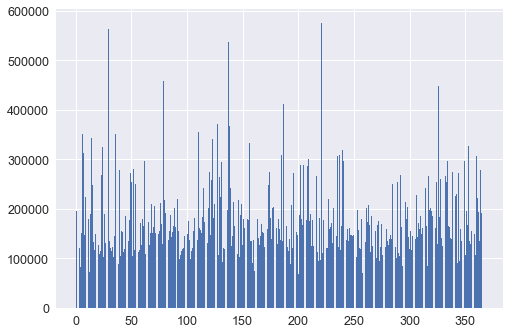

In [99]:
npdf15 = new_train15.values
xtrain15 = npdf15[:,1:]
ytrain15 = npdf15[:,0]
X_train15, X_test15, y_train15, y_test15 = train_test_split(xtrain15, ytrain15, test_size=0.25, random_state=1)
rfr15 = RandomForestRegressor()
rfr15.fit(X_train15,y_train15)
pred15 = rfr15.predict(X_test15)
sc15 = rfr15.score(X_test15,y_test15)
rms15 = np.sqrt(mean_squared_error(np.log1p(y_test15),np.log1p(pred15)))
print("Predictions : {}\nScore : {}\nRMS : {}".format(pred15,sc15,rms15))
plt.bar(range(1,pred15.shape[0]+1),pred15)

Predictions : [ 207065.   163787.4  117750.    82950.   143095.9  342435.4  298113.9
  146370.4  221700.   226745.8  176295.    83000.   196836.5  376467.1
  228680.   104530.   121700.   141140.   202207.8  132715.   124310.
  108145.3  277900.   316754.5  103840.   183700.   135538.2  186708.4
  531342.9  133590.   123690.6  112000.   123415.    96590.   157785.9
  327997.4  118330.    94500.   249780.   121833.2  155511.5  148050.
   87985.   125220.   171470.   167535.   131560.   176078.3  254298.4
  261550.   100200.   285869.9  121550.   227624.6  202360.8  101530.
  121490.   163060.   133590.   174115.   163923.5  288285.6  108670.
  129790.   185090.   132640.   138857.5  203545.   157140.   147225.
  196260.   133933.4  305600.   172270.   151040.   206388.   166040.
  117640.   401029.8  202799.9  206750.   138995.9  136470.   153100.
  185995.   139210.   154300.   175640.   194807.   169795.   199805.8
  159935.   107655.    96530.   141750.   125980.   122500.   138275.


<Container object of 365 artists>

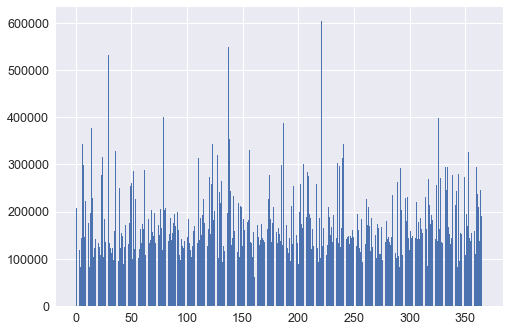

In [100]:
features30 = train_data.corr().nlargest(31,'SalePrice')['SalePrice'].index
new_train30 = train_data[features30]
npdf30 = new_train30.values
xtrain30 = npdf30[:,1:]
ytrain30 = npdf30[:,0]
X_train30, X_test30, y_train30, y_test30 = train_test_split(xtrain30, ytrain30, test_size=0.25, random_state=1)
rfr30 = RandomForestRegressor()
rfr30.fit(X_train30,y_train30)
sc30 = rfr30.score(X_test30,y_test30)
pred30 = rfr30.predict(X_test30)
rms30 = np.sqrt(mean_squared_error(np.log1p(y_test30),np.log1p(pred30)))
print("Predictions : {}\nScore : {}\nRMS : {}".format(pred30,sc30,rms30))
plt.bar(range(1,pred30.shape[0]+1),pred30)

Predictions : [ 207065.   163787.4  117750.    82950.   143095.9  342435.4  298113.9
  146370.4  221700.   226745.8  176295.    83000.   196836.5  376467.1
  228680.   104530.   121700.   141140.   202207.8  132715.   124310.
  108145.3  277900.   316754.5  103840.   183700.   135538.2  186708.4
  531342.9  133590.   123690.6  112000.   123415.    96590.   157785.9
  327997.4  118330.    94500.   249780.   121833.2  155511.5  148050.
   87985.   125220.   171470.   167535.   131560.   176078.3  254298.4
  261550.   100200.   285869.9  121550.   227624.6  202360.8  101530.
  121490.   163060.   133590.   174115.   163923.5  288285.6  108670.
  129790.   185090.   132640.   138857.5  203545.   157140.   147225.
  196260.   133933.4  305600.   172270.   151040.   206388.   166040.
  117640.   401029.8  202799.9  206750.   138995.9  136470.   153100.
  185995.   139210.   154300.   175640.   194807.   169795.   199805.8
  159935.   107655.    96530.   141750.   125980.   122500.   138275.


<Container object of 365 artists>

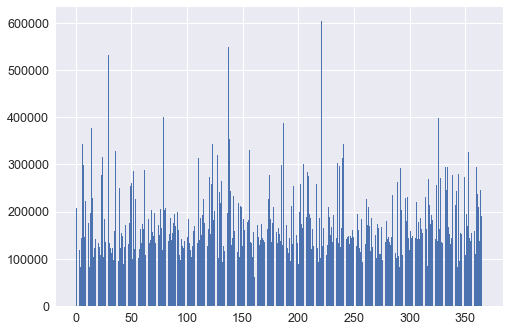

In [106]:
features30 = train_data.corr().nlargest(31,'SalePrice')['SalePrice'].index
new_train30 = train_data[features30]
npdf30 = new_train30.values
xtrain30 = npdf30[:,1:]
ytrain30 = npdf30[:,0]
X_train30, X_test30, y_train30, y_test30 = train_test_split(xtrain30, ytrain30, test_size=0.25, random_state=1)
regr30 = linear_model.LinearRegression()
regr30.fit(X_train30,y_train30)
regrsc30 = regr30.score(X_test30,y_test30)
regrpred30 = rfr30.predict(X_test30)
regrrms30 = np.sqrt(mean_squared_error(np.log1p(y_test30),np.log1p(regrpred30)))
print("Predictions : {}\nScore : {}\nRMS : {}".format(regrpred30,regrsc30,regrrms30))
print ("Model: Linear Regression")
plt.bar(range(1,regrpred30.shape[0]+1),regrpred30)

Predictions : [ 200493.1846888   197473.18549092  127525.56212949   82751.38027308
  171689.10958808  277558.36534827  251088.72208776  146393.05919324
  199512.53395355  223706.81134701  210572.88452983  107003.5217361
  203648.9412792   290469.74232493  242915.2037731   143927.91516911
  121907.29666116  172358.70897771  211528.7352644   132770.50420004
  133084.57679673  212624.17761711  238460.06192438  250155.05729833
  115446.95317685  201295.09760734  150779.96347121  188322.75394972
  334821.06932578  169528.19400016  209097.96469976  140094.76574858
  127597.67202592  120050.65895529  186342.89998993  274357.38726122
  136984.3504846    92816.39691127  270167.35479001  147393.03459875
  168503.79360899  162499.30305154  116216.50763628  134536.56495372
  189383.03206988  220836.13481422  126247.84659077  172035.17372318
  222460.31484846  208635.31327554   86985.76584223  341127.39854042
  138748.71393029  223987.2280438   190963.81707968  110407.04964145
  126855.15249348  15

<Container object of 365 artists>

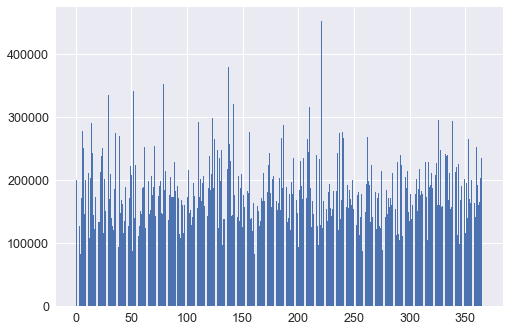

In [107]:
features30 = train_data.corr().nlargest(31,'SalePrice')['SalePrice'].index
new_train30 = train_data[features30]
npdf30 = new_train30.values
xtrain30 = npdf30[:,1:]
ytrain30 = npdf30[:,0]
X_train30, X_test30, y_train30, y_test30 = train_test_split(xtrain30, ytrain30, test_size=0.25, random_state=1)
mlpr = MLPRegressor(hidden_layer_sizes=(100,50))
mlpr.fit(X_train30, y_train30)
mlprsc = mlpr.score(X_test30, y_test30)
mlprpred = mlpr.predict(X_test30)
mlprrms = np.sqrt(mean_squared_error(np.log1p(y_test30),np.log1p(mlprpred)))
print("Predictions : {}\nScore : {}\nRMS : {}".format(mlprpred,mlprsc,mlprrms))
print("Model: MLPRegressor(hidden_layer_sizes=(100,50))")
plt.bar(range(1,mlprpred.shape[0]+1),mlprpred)


Predictions : [ 198194.23428309  181496.41628358  109724.58657071   48169.87802543
  169740.72787871  294500.67850198  253979.69934837  132251.24433033
  191954.61035813  230702.23200358  213181.50882008   77005.16139041
  202818.51781494  324752.36874893  255738.25993079  125788.25215573
  105969.67059393  165502.80204587  220175.07549001  116841.67459843
  111229.26090457  206180.0487474   248279.34272496  264476.45470244
   95228.18374032  196719.15386528  135904.88877705  181413.55611582
  352672.03208264  165797.93051269  200336.38834966  123348.69308473
  111028.72435988   99862.31446738  184750.75114601  291329.65126411
  120970.9582361    55551.78303681  279629.00354808  132047.31388809
  152836.4653659   151541.79777855   95399.82933796  122635.51548966
  179706.9186407   224666.85784714  105230.75296968  160069.06768191
  228894.11074001  211181.97779464   50987.93260486  360645.60917506
  136711.2239502   222733.32220958  191155.89620712   88055.54906849
  110374.01953002  1

<Container object of 365 artists>

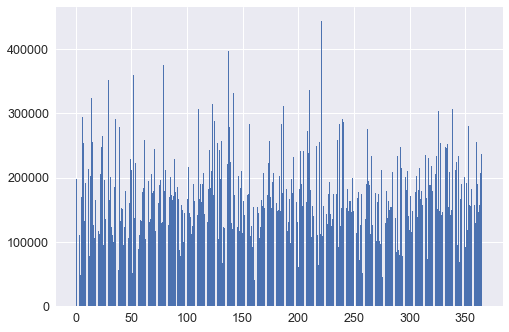

In [108]:
features30 = train_data.corr().nlargest(31,'SalePrice')['SalePrice'].index
new_train30 = train_data[features30]
npdf30 = new_train30.values
xtrain30 = npdf30[:,1:]
ytrain30 = npdf30[:,0]
X_train30, X_test30, y_train30, y_test30 = train_test_split(xtrain30, ytrain30, test_size=0.25, random_state=1)
mlpr = MLPRegressor(hidden_layer_sizes=(15,30,10))
mlpr.fit(X_train30, y_train30)
mlprsc = mlpr.score(X_test30, y_test30)
mlprpred = mlpr.predict(X_test30)
mlprrms = np.sqrt(mean_squared_error(np.log1p(y_test30),np.log1p(mlprpred)))
print("Predictions : {}\nScore : {}\nRMS : {}".format(mlprpred,mlprsc,mlprrms))
print("Model : MLPRegressor(hidden_layer_sizes=(15,30,10))")
plt.bar(range(1,mlprpred.shape[0]+1),mlprpred)


Predictions : [ 199347.74171141  192732.4058969   139457.8632169    94339.02241308
  174846.88202034  255973.665409    240366.38238293  142439.40036102
  199715.41984022  216125.01520024  206374.9393323   122216.76928796
  187328.86535739  285569.27534054  226874.1140246   153574.62737343
  132819.45392036  174256.09141774  212156.40331894  142131.01172207
  145095.89823667  208008.55650895  213978.54549843  236998.83330755
  129069.42799889  195700.09616444  154337.637283    189119.48296989
  310649.12456311  153529.66898518  202894.38652034  133630.91369631
  137690.71421638  132892.69457821  183492.06635975  256792.01487096
  145977.56385977  107907.62230863  252864.47072671  155872.75586076
  174497.19395707  167478.10183992  126372.72351     144377.59964807
  188146.26150061  215423.3583394   135221.20461951  164246.87910162
  215092.94352734  208907.71970082  102590.7079158   315685.32890712
  141714.5311081   216013.99528381  189055.80374218  123125.55905597
  138643.04126185  1

<Container object of 365 artists>

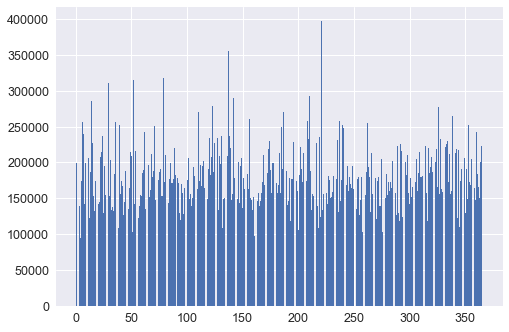

In [109]:
features30 = train_data.corr().nlargest(31,'SalePrice')['SalePrice'].index
new_train30 = train_data[features30]
npdf30 = new_train30.values
xtrain30 = npdf30[:,1:]
ytrain30 = npdf30[:,0]
X_train30, X_test30, y_train30, y_test30 = train_test_split(xtrain30, ytrain30, test_size=0.25, random_state=1)
mlpr = MLPRegressor(hidden_layer_sizes=(110))
mlpr.fit(X_train30, y_train30)
mlprsc = mlpr.score(X_test30, y_test30)
mlprpred = mlpr.predict(X_test30)
mlprrms = np.sqrt(mean_squared_error(np.log1p(y_test30),np.log1p(mlprpred)))
print("Predictions : {}\nScore : {}\nRMS : {}".format(mlprpred,mlprsc,mlprrms))
print("Model: MLPRegressor(hidden_layer_sizes=(110))")
plt.bar(range(1,mlprpred.shape[0]+1),mlprpred)


Predictions : [ 199322.25127304  191897.13929744  141707.5586324    95064.85100841
  175028.45044588  252167.04430446  239395.78248544  142897.76716869
  200084.69383741  214199.32359329  205355.07447256  124934.2184909
  187270.05829319  279685.25579121  223310.17777915  155514.4171427
  135316.69166145  175312.09595568  210184.10017534  144002.82124326
  147276.13556732  207732.98416231  210980.79836534  234719.31232393
  132191.70238987  194858.32932749  155646.20802927  190489.33703659
  307109.14662035  153935.34779219  201761.79690475  134598.71796275
  140158.66395204  135127.78009436  183364.63368289  253634.31892654
  147868.6946534   111164.5560223   249877.00548084  157237.47444891
  175385.62750835  168676.53007477  128986.60365979  146668.73034129
  188931.59724641  214320.83410551  137824.39780025  164593.27357338
  215103.50602941  207126.78517007  105105.51706888  311460.20642695
  143281.31398996  215235.76180419  190055.5439874   126247.81180594
  140697.15225549  155

<Container object of 365 artists>

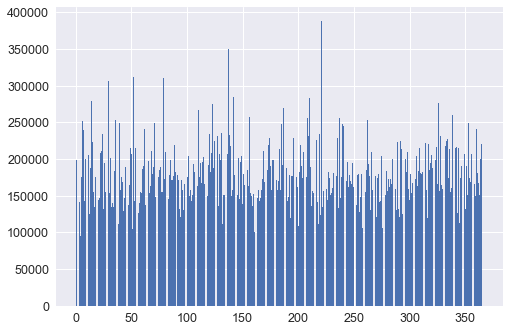

In [110]:
features30 = train_data.corr().nlargest(31,'SalePrice')['SalePrice'].index
new_train30 = train_data[features30]
npdf30 = new_train30.values
xtrain30 = npdf30[:,1:]
ytrain30 = npdf30[:,0]
X_train30, X_test30, y_train30, y_test30 = train_test_split(xtrain30, ytrain30, test_size=0.25, random_state=1)
mlpr = MLPRegressor(hidden_layer_sizes=(100))
mlpr.fit(X_train30, y_train30)
mlprsc = mlpr.score(X_test30, y_test30)
mlprpred = mlpr.predict(X_test30)
mlprrms = np.sqrt(mean_squared_error(np.log1p(y_test30),np.log1p(mlprpred)))
print("Predictions : {}\nScore : {}\nRMS : {}".format(mlprpred,mlprsc,mlprrms))
print("Model : MLPRegressor(hidden_layer_sizes=(100))")
plt.bar(range(1,mlprpred.shape[0]+1),mlprpred)


Predictions : [ 200238.81035995  192365.39383945  143031.91826656   95700.16253161
  175486.00694975  250147.17178635  239874.51613847  140416.52212864
  201357.23556312  213476.72229511  205156.19878573  126508.08508217
  180906.66966947  281641.64876955  220808.41740561  156521.49639378
  136932.48027978  175669.29309076  211041.16961627  145089.27740618
  147896.06262596  208699.76493828  204121.09863522  234008.51064957
  134054.2458178   195550.17275539  156354.76867867  191141.92659272
  304965.02785596  146522.1053412   200796.57878007  129714.12843942
  141358.76433074  137008.80374458  183022.59146263  252260.71864208
  148586.58454169  113044.87824093  248888.66464359  159214.93570481
  176532.76710273  169055.96073811  130468.01004552  148309.87619454
  189479.58676459  213528.17454572  139209.77001111  160176.80846657
  215605.1828513   208917.22855049  108406.31630447  311242.70994281
  144931.44416312  215201.97535608  191021.51177894  127834.11739436
  142134.42571105  1

<Container object of 365 artists>

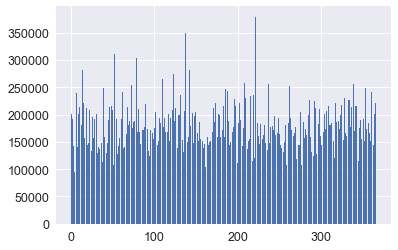

In [598]:
features30 = train_data.corr().nlargest(31,'SalePrice')['SalePrice'].index
new_train30 = train_data[features30]
npdf30 = new_train30.values
xtrain30 = npdf30[:,1:]
ytrain30 = npdf30[:,0]
X_train30, X_test30, y_train30, y_test30 = train_test_split(xtrain30, ytrain30, test_size=0.25, random_state=1)
mlpr = MLPRegressor(hidden_layer_sizes=(80))
mlpr.fit(X_train30, y_train30)
mlprsc = mlpr.score(X_test30, y_test30)
mlprpred = mlpr.predict(X_test30)
mlprrms = np.sqrt(mean_squared_error(np.log1p(y_test30),np.log1p(mlprpred)))
print("Predictions : {}\nScore : {}\nRMS : {}".format(mlprpred,mlprsc,mlprrms))
plt.bar(range(1,mlprpred.shape[0]+1),mlprpred)


Predictions : [ 196581.72191362  187205.01796078  147205.02429865  102294.86174538
  176991.81509494  240348.33203834  229963.10067274  145528.38195617
  196745.76687704  210972.53470974  202853.4138197   133257.99362472
  188372.83627299  296177.41536158  216901.33377417  157862.76441322
  139591.0323941   174649.21073854  215571.86499609  147495.49257015
  151179.24857557  202402.92337117  207159.20689833  228100.17788066
  138340.29459853  189836.49283513  155071.68447548  188223.18452794
  290450.90669805  155873.56805673  195957.83255191  138557.23544989
  143605.3579317   142624.46290655  181069.11891322  244304.12890116
  150852.5107789   118398.15287041  238664.34539554  160458.95049108
  176489.39650839  169487.80614021  132309.85394727  151178.33685978
  184673.87757226  210921.96143136  139046.18037037  167346.66680264
  209673.8710316   208454.24549628  118898.32489373  294458.47693884
  145019.78017358  207827.52855774  187438.10794489  130877.87847551
  146433.25783616  1

<Container object of 365 artists>

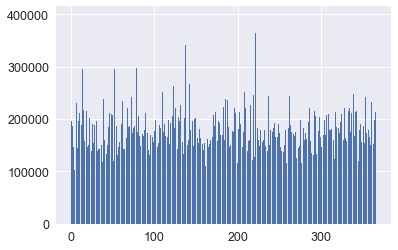

In [599]:
features30 = train_data.corr().nlargest(31,'SalePrice')['SalePrice'].index
new_train30 = train_data[features30]
npdf30 = new_train30.values
xtrain30 = npdf30[:,1:]
ytrain30 = npdf30[:,0]
X_train30, X_test30, y_train30, y_test30 = train_test_split(xtrain30, ytrain30, test_size=0.25, random_state=1)
mlpr = MLPRegressor(hidden_layer_sizes=(60))
mlpr.fit(X_train30, y_train30)
mlprsc = mlpr.score(X_test30, y_test30)
mlprpred = mlpr.predict(X_test30)
mlprrms = np.sqrt(mean_squared_error(np.log1p(y_test30),np.log1p(mlprpred)))
print("Predictions : {}\nScore : {}\nRMS : {}".format(mlprpred,mlprsc,mlprrms))
plt.bar(range(1,mlprpred.shape[0]+1),mlprpred)


Predictions : [ 197423.45942505  186567.15875628  146874.62764005   96066.48465218
  176537.28059534  238778.62527189  230999.73959779  136477.49803064
  198277.0285858   209888.49009843  202177.74783832  133186.05883345
  175742.48906126  304184.56431907  212483.95294774  157983.36132863
  138445.44456464  173553.57769046  217897.03655387  146466.44313595
  150475.53441625  203283.9167445   197111.17578492  226911.88706988
  138195.86897748  189624.39288941  152412.83462363  187145.92146985
  289847.8241582   142632.24751592  193251.38815042  127087.08822512
  142568.4160662   143386.03260476  179426.16154052  242791.76783324
  149840.36814594  117388.21854316  238328.12624916  161265.59473419
  176931.46614988  168623.75443588  129969.7861627   150739.2385486
  183383.91873517  210101.26453161  137522.68663919  156357.74261403
  208416.15377812  209613.94022465  119156.06729362  297518.75081725
  143395.69959963  207743.27976338  186214.48820914  129792.30029164
  145918.50280298  15

<Container object of 365 artists>

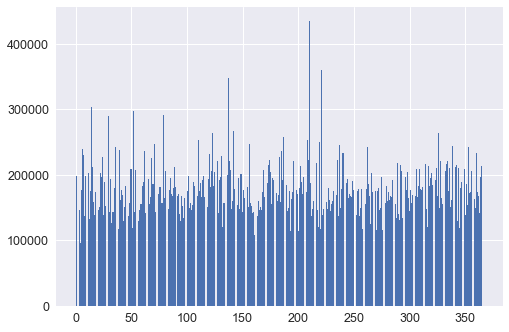

In [105]:
features30 = train_data.corr().nlargest(31,'SalePrice')['SalePrice'].index
new_train30 = train_data[features30]
npdf30 = new_train30.values
xtrain30 = npdf30[:,1:]
ytrain30 = npdf30[:,0]
X_train30, X_test30, y_train30, y_test30 = train_test_split(xtrain30, ytrain30, test_size=0.25, random_state=1)
mlpr = MLPRegressor(hidden_layer_sizes=(50))
mlpr.fit(X_train30, y_train30)
mlprsc = mlpr.score(X_test30, y_test30)
mlprpred = mlpr.predict(X_test30)
mlprrms = np.sqrt(mean_squared_error(np.log1p(y_test30),np.log1p(mlprpred)))
print("Predictions : {}\nScore : {}\nRMS : {}".format(mlprpred,mlprsc,mlprrms))
plt.bar(range(1,mlprpred.shape[0]+1),mlprpred)


Predictions : [ 192362.35271556  176357.56160666  145197.49968317   89881.20470438
  173023.61121176  225074.2577479   222839.94385232  128523.24212487
  193471.85173752  202058.79741751  196318.83301431  132638.40946176
  166309.26974923  326626.23628836  200618.89097927  154377.13248607
  135246.8385829   167794.63029646  221287.62397063  142416.4706985
  146281.47024288  196280.79587722  183223.1591344   218698.43994896
  138054.22513456  180980.93637192  145414.08961904  181895.14307605
  278919.41560492  131424.67653024  183789.24520442  117563.0781357
  138768.38312711  144192.24487688  171054.40044191  232589.55884486
  145187.96739374  114678.99656912  226285.09355152  159957.90638768
  172617.18141372  163610.70361163  124406.87852865  149462.76069169
  175856.23179645  202799.10001827  131536.39569003  148096.03203906
  202711.06158655  208221.1989984   122810.24908716  288149.90692687
  139021.12590324  197973.53650002  181273.66406735  126375.72353574
  144108.10283388  148

<Container object of 365 artists>

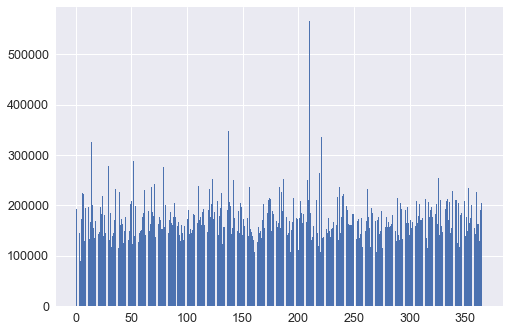

In [111]:
features30 = train_data.corr().nlargest(31,'SalePrice')['SalePrice'].index
new_train30 = train_data[features30]
npdf30 = new_train30.values
xtrain30 = npdf30[:,1:]
ytrain30 = npdf30[:,0]
X_train30, X_test30, y_train30, y_test30 = train_test_split(xtrain30, ytrain30, test_size=0.25, random_state=1)
mlpr = MLPRegressor(hidden_layer_sizes=(30))
mlpr.fit(X_train30, y_train30)
mlprsc = mlpr.score(X_test30, y_test30)
mlprpred = mlpr.predict(X_test30)
mlprrms = np.sqrt(mean_squared_error(np.log1p(y_test30),np.log1p(mlprpred)))
print("Predictions : {}\nScore : {}\nRMS : {}".format(mlprpred,mlprsc,mlprrms))
print("Model : MLPRegressor(hidden_layer_sizes=(30))")
plt.bar(range(1,mlprpred.shape[0]+1),mlprpred)
